In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas matplotlib numpy

In [192]:
import sqlite3, random
import pandas as pd
import numpy as np
import xml.dom.minidom as xd

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
conn = sqlite3.connect('../data/soccer/database.sqlite')

In [59]:
df = pd.read_sql_query('''SELECT Match.date, Match.league_id,
                                    AwayTeam.team_long_name AS away_team_name,
                                    AwayTeam.team_short_name AS away_team_abbr,
                                    Match.away_team_goal,
                                    HomeTeam.team_long_name AS home_team_name,
                                    HomeTeam.team_short_name AS home_team_abbr,
                                    Match.home_team_goal,
                                    Match.home_player_X1, Match.home_player_Y1,
                                    Match.home_player_X2, Match.home_player_Y2,
                                    Match.home_player_X3, Match.home_player_Y3,
                                    Match.home_player_X4, Match.home_player_Y4,
                                    Match.home_player_X5, Match.home_player_Y5,
                                    Match.home_player_X6, Match.home_player_Y6,
                                    Match.home_player_X7, Match.home_player_Y7,
                                    Match.home_player_X8, Match.home_player_Y8,
                                    Match.home_player_X9, Match.home_player_Y9,
                                    Match.home_player_X10, Match.home_player_Y10,
                                    Match.home_player_X11, Match.home_player_Y11,
                                    Match.away_player_X1, Match.away_player_Y1,
                                    Match.away_player_X2, Match.away_player_Y2,
                                    Match.away_player_X3, Match.away_player_Y3,
                                    Match.away_player_X4, Match.away_player_Y4,
                                    Match.away_player_X5, Match.away_player_Y5,
                                    Match.away_player_X6, Match.away_player_Y6,
                                    Match.away_player_X7, Match.away_player_Y7,
                                    Match.away_player_X8, Match.away_player_Y8,
                                    Match.away_player_X9, Match.away_player_Y9,
                                    Match.away_player_X10, Match.away_player_Y10,
                                    Match.away_player_X11, Match.away_player_Y11,
                                    HomePlayer1.player_name AS home_player_1,
                                    HomePlayer2.player_name AS home_player_2,
                                    HomePlayer3.player_name AS home_player_3,
                                    HomePlayer4.player_name AS home_player_4,
                                    HomePlayer5.player_name AS home_player_5,
                                    HomePlayer6.player_name AS home_player_6,
                                    HomePlayer7.player_name AS home_player_7,
                                    HomePlayer8.player_name AS home_player_8,
                                    HomePlayer9.player_name AS home_player_9,
                                    HomePlayer10.player_name AS home_player_10,
                                    HomePlayer11.player_name AS home_player_11,
                                    AwayPlayer1.player_name AS away_player_1,
                                    AwayPlayer2.player_name AS away_player_2,
                                    AwayPlayer3.player_name AS away_player_3,
                                    AwayPlayer4.player_name AS away_player_4,
                                    AwayPlayer5.player_name AS away_player_5,
                                    AwayPlayer6.player_name AS away_player_6,
                                    AwayPlayer7.player_name AS away_player_7,
                                    AwayPlayer8.player_name AS away_player_8,
                                    AwayPlayer9.player_name AS away_player_9,
                                    AwayPlayer10.player_name AS away_player_10,
                                    AwayPlayer11.player_name AS away_player_11
                        FROM Match
                        JOIN Team AwayTeam ON AwayTeam.team_api_id = Match.away_team_api_id
                        JOIN Team HomeTeam ON HomeTeam.team_api_id = Match.home_team_api_id
                        JOIN League ON League.country_id = Match.league_id AND
                            (League.name = "England Premier League" OR
                            League.name = "Germany 1. Bundesliga" OR
                            League.name = "France Ligue 1" OR
                            League.name = "Italy Serie A" OR
                            League.name = "Spain LIGA BBVA")
                        JOIN Player HomePlayer1 ON HomePlayer1.player_api_id = Match.home_player_1
                        JOIN Player HomePlayer2 ON HomePlayer2.player_api_id = Match.home_player_2
                        JOIN Player HomePlayer3 ON HomePlayer3.player_api_id = Match.home_player_3
                        JOIN Player HomePlayer4 ON HomePlayer4.player_api_id = Match.home_player_4
                        JOIN Player HomePlayer5 ON HomePlayer5.player_api_id = Match.home_player_5
                        JOIN Player HomePlayer6 ON HomePlayer6.player_api_id = Match.home_player_6
                        JOIN Player HomePlayer7 ON HomePlayer7.player_api_id = Match.home_player_7
                        JOIN Player HomePlayer8 ON HomePlayer8.player_api_id = Match.home_player_8
                        JOIN Player HomePlayer9 ON HomePlayer9.player_api_id = Match.home_player_9
                        JOIN Player HomePlayer10 ON HomePlayer10.player_api_id = Match.home_player_10
                        JOIN Player HomePlayer11 ON HomePlayer11.player_api_id = Match.home_player_11
                        JOIN Player AwayPlayer1 ON AwayPlayer1.player_api_id = Match.away_player_1
                        JOIN Player AwayPlayer2 ON AwayPlayer2.player_api_id = Match.away_player_2
                        JOIN Player AwayPlayer3 ON AwayPlayer3.player_api_id = Match.away_player_3
                        JOIN Player AwayPlayer4 ON AwayPlayer4.player_api_id = Match.away_player_4
                        JOIN Player AwayPlayer5 ON AwayPlayer5.player_api_id = Match.away_player_5
                        JOIN Player AwayPlayer6 ON AwayPlayer6.player_api_id = Match.away_player_6
                        JOIN Player AwayPlayer7 ON AwayPlayer7.player_api_id = Match.away_player_7
                        JOIN Player AwayPlayer8 ON AwayPlayer8.player_api_id = Match.away_player_8
                        JOIN Player AwayPlayer9 ON AwayPlayer9.player_api_id = Match.away_player_9
                        JOIN Player AwayPlayer10 ON AwayPlayer10.player_api_id = Match.away_player_10
                        JOIN Player AwayPlayer11 ON AwayPlayer11.player_api_id = Match.away_player_11''', conn)

2008-08-31, FC Bayern Munich (home) vs. Hertha BSC Berlin (away)
BMU 4 : 1 HBE	BMU: 3-2-3-2, HBE: 3-2-3-2


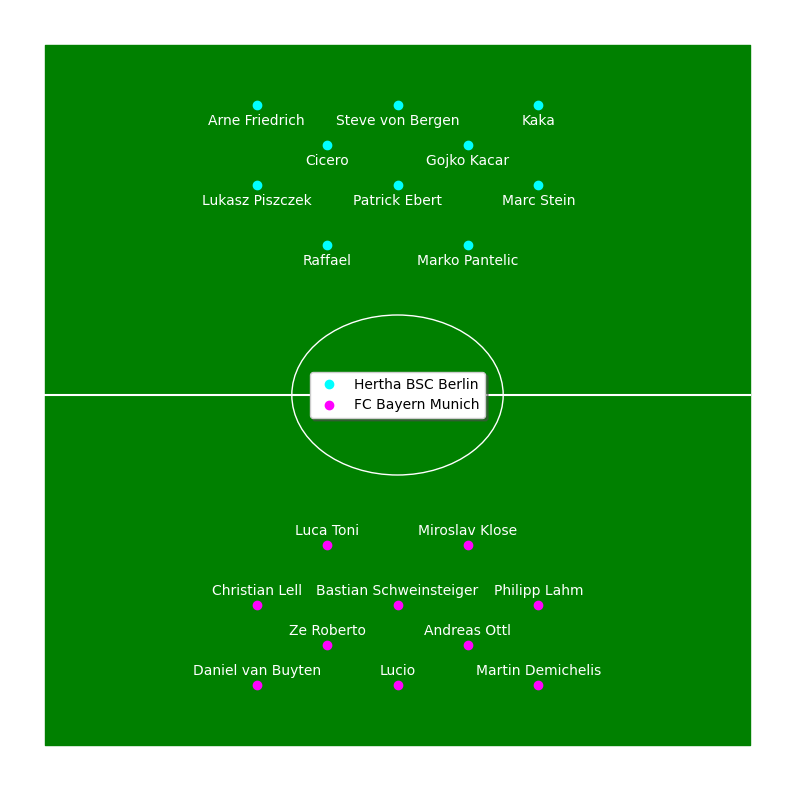

In [121]:
match_id = random.randint(0, 13655)
# match_id = 5984
show_summary(df, match_id)
show_formations(df, match_id)

In [47]:
def show_summary(df, match_id):
    match = df.iloc[match_id]
    print(f'{match['date'].split(' ')[0]}', end=', ')
    print(f'{match['home_team_name']} (home) vs. {match['away_team_name']} (away)')
    print(f'{match['home_team_abbr']} {match['home_team_goal']} : {match['away_team_goal']} {match['away_team_abbr']}', end='\t')
    print(f'{match['home_team_abbr']}: {identify_formation(match, side='home')}', end=', ')
    print(f'{match['away_team_abbr']}: {identify_formation(match, side='away')}')

In [6]:
def show_formations(df, match_id):
    match = df.iloc[match_id]
    plt.figure(figsize=(10, 10))
    
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(match[f'away_player_X{i}'])
        y.append(35 - match[f'away_player_Y{i}'])
        plt.annotate(match[f'away_player_{i}'], (x[-1], y[-1] - 1), ha='center', color='w')
    
    plt.plot(x, y, 'o', color='cyan')
        
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(match[f'home_player_X{i}'])
        y.append(match[f'home_player_Y{i}'])
        plt.annotate(match[f'home_player_{i}'], (x[-1], y[-1] + 0.5), ha='center', color='w')
    
    plt.plot(x, y, 'o', color='magenta')
    plt.legend([match['away_team_name'], match['home_team_name']], loc='center', fancybox=True, shadow=True)
    
    plt.fill_between([0, 10], [0, 0], [35, 35], color='g')
    plt.plot([0, 10], [17.5, 17.5], color='w')
    
    circle = Ellipse((5, 17.5), 3, 8, color='w', fill=False)
    plt.gca().add_patch(circle)

    plt.axis('off')
    plt.show()

In [114]:
def identify_formation(match, side='home'):
    lines = [0] * 15
    prev_y = 0
    formation = ''
    
    for i in range(2, 12):
        lines[int(match[f'{side}_player_Y{i}'])] += 1

    for i in lines:
        if i == 0:
            continue

        formation += f'{i}-'

    return formation[0:-1]

### Which formation is best?

I took all matches from 2008 to 2015 in Europe's top 5 leagues (Premier League, La Liga, Bundesliga, Serie A, and Ligue 1) in order to figure out whether one formation was statistically better than the rest. For the purposes of this analysis, I'm ignoring all other factors such as team strength or home/away factor, and discarding data for formations used in less than 500 matches.

In [130]:
formations = {
    'away_formation': [],
    'away_score': [],
    'home_formation': [],
    'home_score': []
}

for index, row in df.iterrows():
    try:
        data['away_formation'].append(identify_formation(row, side='away'))
        data['away_score'].append(row['away_team_goal'])
        data['home_formation'].append(identify_formation(row))
        data['home_score'].append(row['home_team_goal'])
        
        data['home_formation'].append(identify_formation(row, side='away'))
        data['home_score'].append(row['away_team_goal'])
        data['away_formation'].append(identify_formation(row))
        data['away_score'].append(row['home_team_goal'])
    except:
        continue

formations_df = pd.DataFrame(data)

In [251]:
formation_data = []

for formation in formations_df['away_formation'].unique():
    formation_data.append({'formation': formation, 'matches': 0, 'points': 0, 'ppm': 0, 'wins': 0, 'win_pct': 0})
                           
    for index, row in formations_df.iterrows():
        if row['away_formation'] != formation:
            continue
            
        if row['away_score'] > row['home_score']:
            formation_data[-1]['points'] += 3
            formation_data[-1]['wins'] += 1
        elif row['away_score'] == row['home_score']:
            formation_data[-1]['points'] += 1

        formation_data[-1]['matches'] += 1

    formation_data[-1]['ppm'] = round(formation_data[-1]['points'] / formation_data[-1]['matches'], 2)
    formation_data[-1]['win_pct'] = round(formation_data[-1]['wins'] / formation_data[-1]['matches'], 3)

formation_data_df = pd.DataFrame(formation_data)
formation_data_df = formation_data_df[formation_data_df['matches'] >= 500] # only consider formations with big enough sample size

In [180]:
def graph_barh_sorted(sort_by='matches', label='', highlight=['4-3-3', '4-4-2', '4-2-3-1']):
    sorted_df = pd.DataFrame(formation_data_df.sort_values(sort_by))
    colors = []
    
    for index, row in sorted_df.iterrows():
        if row['formation'] in highlight:
            colors.append('tomato')
        else:
            colors.append('lightblue')
    
    plt.barh(sorted_df['formation'], sorted_df[sort_by], color=colors)
    
    plt.xlabel(label)
    plt.ylabel('Formation')
    
    plt.show()

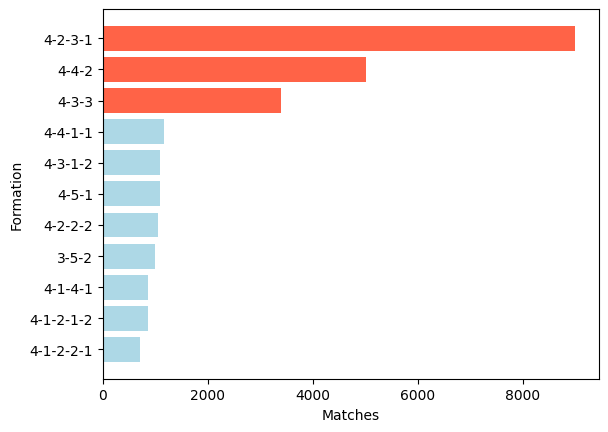

In [181]:
graph_barh_sorted(label='Matches')

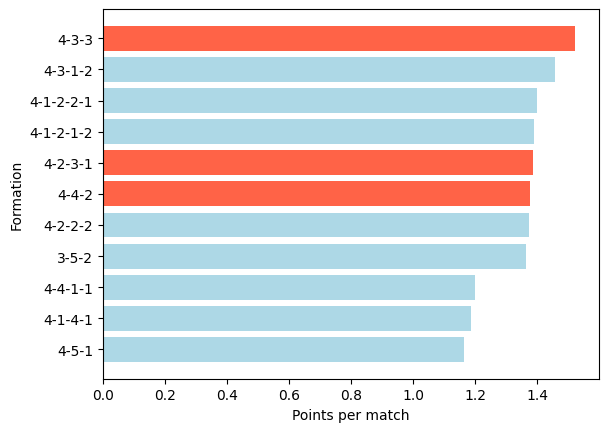

In [182]:
graph_barh_sorted(sort_by='ppm', label='Points per match')

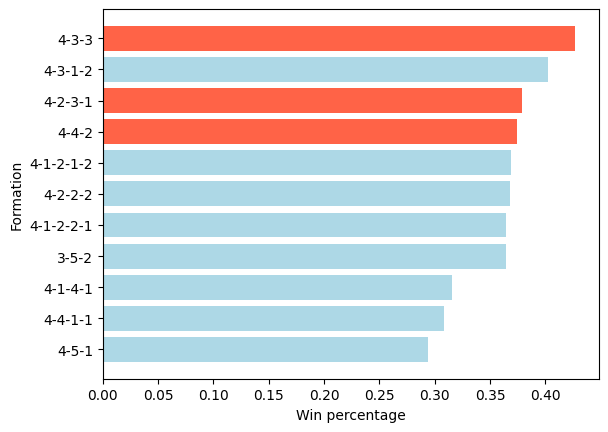

In [183]:
graph_barh_sorted(sort_by='win_pct', label='Win percentage')

### Formation vs. formation

We can see that the 4-2-3-1 formation has been the most popular by a significant margin, with 4-4-2 and 4-3-3 coming in second and third, respectively. Yet, it is the 4-3-3 formation that grabs the top spot when it comes to performance, leading the way in both points per match and win percentage.

Now, let's put each formation in a 1v1 against every other formation to see which one comes out on top.

In [270]:
formation_matrix_matches = []
formation_matrix_ppm = []
i = -1

for formation in formation_data_df['formation']:
    formation_matrix_matches.append([])
    formation_matrix_ppm.append([])
    
    i += 1
    j = -1

    for opp_formation in formation_data_df['formation']:
        formation_matrix_matches[i].append(0)
        formation_matrix_ppm[i].append(0)
        
        j += 1
        
        n_matches = 0
        n_points = 0

        for index, row in formations_df.iterrows():
            if row['away_formation'] != formation or row['home_formation'] != opp_formation:
                continue

            if row['away_score'] > row['home_score']:
                n_points += 3
            elif row['away_score'] == row['home_score']:
                n_points += 1

            n_matches += 1

        if n_matches == 0:
            continue

        formation_matrix_matches[i][j] = n_matches
        formation_matrix_ppm[i][j] = round(n_points / n_matches, 2)

In [265]:
# creating annotated matrix heatmaps
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
def show_matrix_heatmap(matrix, label=''):
    matrix = np.array(matrix)
    plt.figure(figsize=(10, 10))
    
    ax = plt.gca()
    im = ax.imshow(matrix)
    
    ax.set_xticks(np.arange(matrix.shape[1]), labels=formation_data_df['formation'])
    ax.set_yticks(np.arange(matrix.shape[0]), labels=formation_data_df['formation'])
    
    plt.setp(ax.get_xticklabels(), rotation=60, rotation_mode='anchor', ha='right')
    
    colorbar = ax.figure.colorbar(im, ax=ax)
    colorbar.ax.set_ylabel(label, rotation=-90, va='bottom')
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            im.axes.text(j, i, matrix[i, j], color='white', ha='center', va='center', font='monospace')
    
    plt.show()

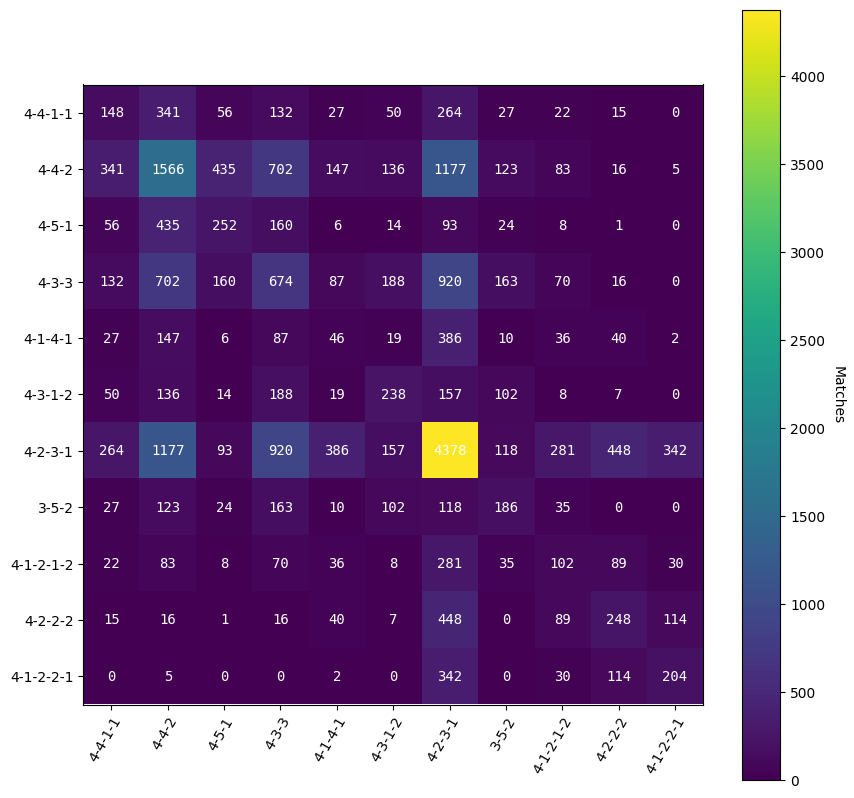

In [272]:
show_matrix_heatmap(formation_matrix_matches, label='Matches')

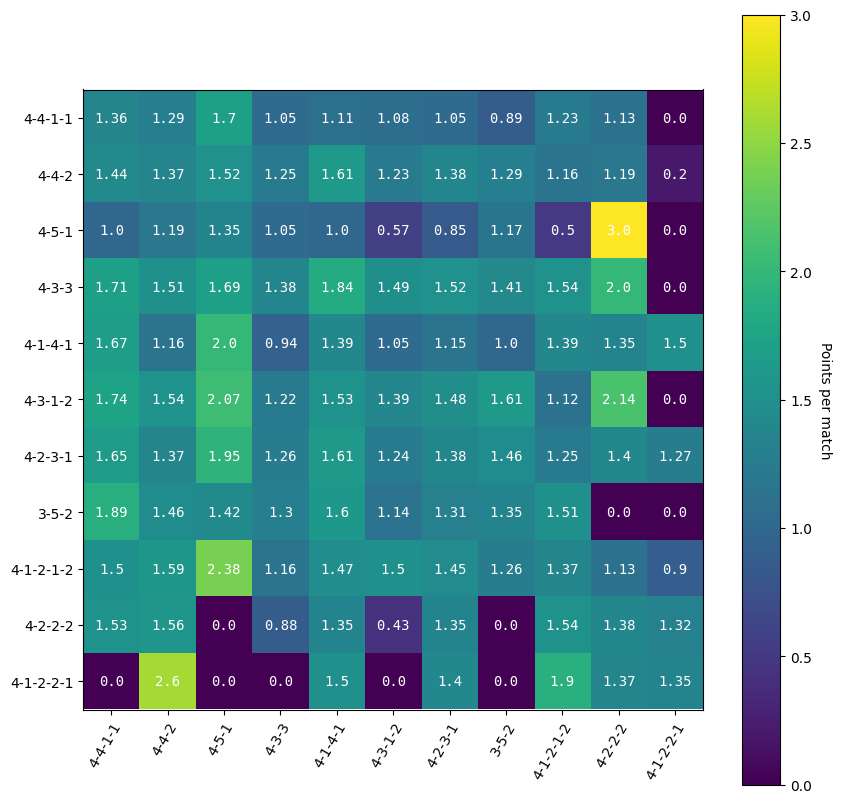

In [274]:
show_matrix_heatmap(formation_matrix_ppm, label='Points per match')